In [1]:
# auto reload modules
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('binary')

from utils import (
    filter_data, add_logarithmic_variables, plot_correlations, bar_plot
    )

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [43]:
# Get root directory
root_dir = os.path.dirname(os.path.abspath(''))

# read data
data = pd.read_csv(
    os.path.join(root_dir, 'data', 'CHC_base_anonimizada09-09-2021.csv')
    )

# filter data
data_filter = filter_data(data)

# add logarithmic variables
add_logarithmic_variables(data_filter)

# save filter data
data_filter.to_csv(
    os.path.join(root_dir, 'data', 'filtered_data.csv'),
    index=False
    )

In [44]:
len(data), len(data_filter)

(6250, 5340)

In [3]:
data_filter

,age,gender,race_minority,years_education,disability,disease,anios_en_calle,family_contact,recieves_help,drug_consumption,avg_age_drug_consumption,lgbt_minority,ln_years_street
0,44.0,1,0,7.0,1,0,14.916667,1,0,0,0.000000,0,2.702479
1,33.0,1,0,2.0,1,0,14.000000,1,0,0,0.000000,0,2.639057
2,41.0,1,0,15.0,1,0,3.000000,1,0,0,0.000000,0,1.098612
3,29.0,1,0,7.0,0,0,5.000000,1,0,0,0.000000,0,1.609438
4,30.0,1,0,11.0,0,0,14.000000,1,0,0,0.000000,0,2.639057
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5338,44.0,1,1,15.0,0,0,2.000000,0,1,1,19.000000,0,0.693147
5339,35.0,1,0,2.0,0,0,20.000000,0,1,1,15.500000,0,2.995732
5340,53.0,1,1,2.0,0,0,22.000000,0,1,0,0.000000,0,3.091042
5341,57.0,0,0,7.0,1,1,9.500000,0,0,1,25.000000,0,2.251292


In [4]:
# plot correlations
variables_interest = [
    'ln_years_street',
    'gender',
    'race_minority',
    'lgbt_minority',
    'disability',
    'disease',
    'family_contact',
    'recieves_help',
    'years_education',
    'drug_consumption',
    'avg_age_drug_consumption',
    'age'
]

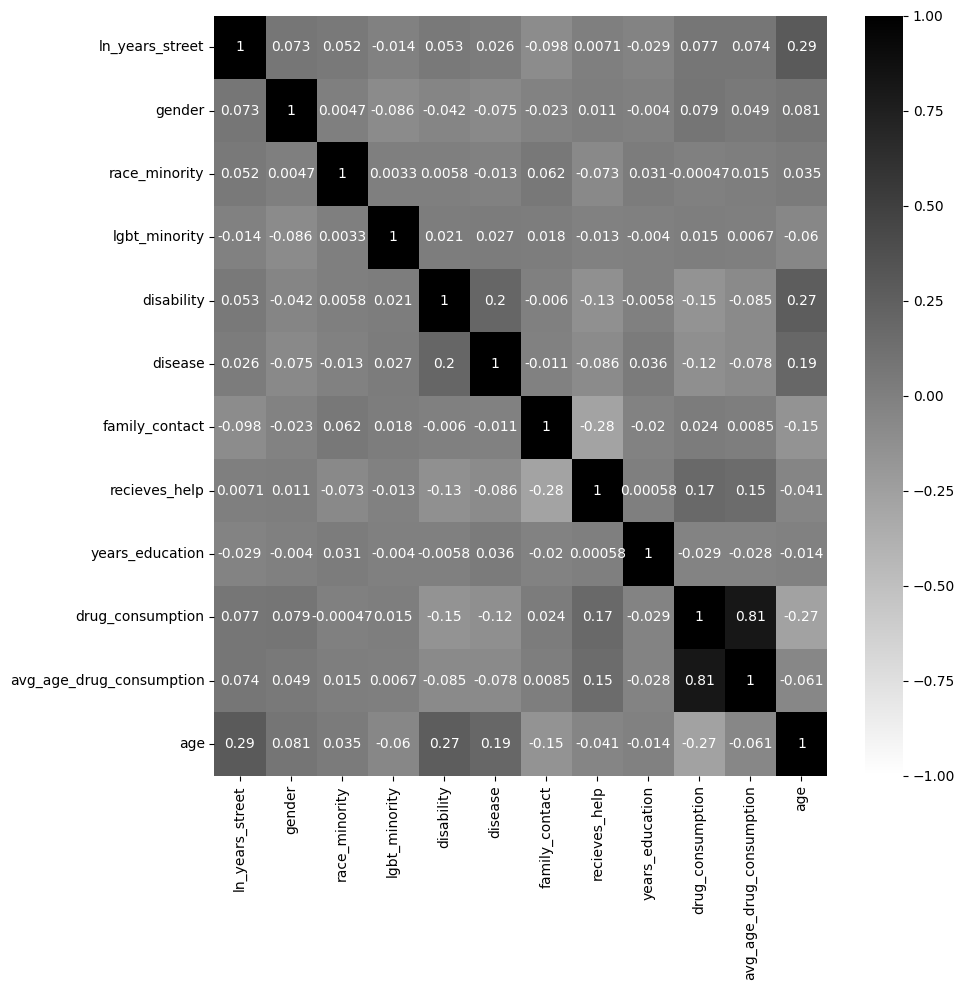

In [50]:
plot_correlations(
    data_filter,
    variables_interest,
    save=True
    )

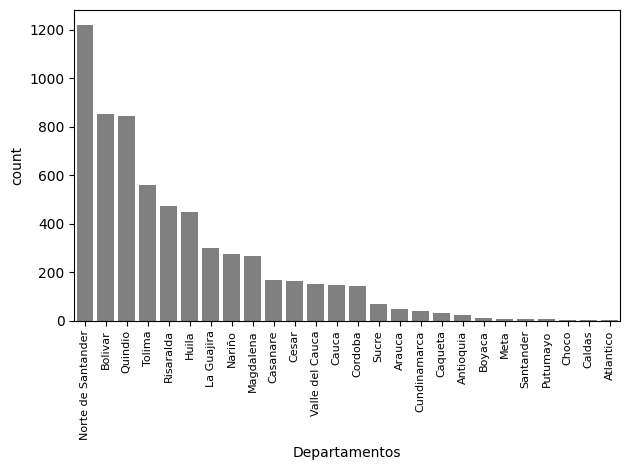

In [39]:
# make barplot in descendent order with seaborn with binary color a little bit darker
data['P1'].replace({
    91: 'Amazonas',
    5: 'Antioquia',
    81: 'Arauca',
    8: 'Atlantico',
    88: 'San Andres y Santa Catalina',
    13: 'Bolivar',
    15: 'Boyaca',
    17: 'Caldas',
    18: 'Caqueta',
    85: 'Casanare',
    19: 'Cauca',
    20: 'Cesar',
    27: 'Choco',
    23: 'Cordoba',
    25: 'Cundinamarca',
    94: 'Guainia',
    41: 'Huila',
    44: 'La Guajira',
    47: 'Magdalena',
    50: 'Meta',
    52: 'Nariño',
    54: 'Norte de Santander',
    86: 'Putumayo',
    63: 'Quindio',
    66: 'Risaralda',
    68: 'Santander',
    70: 'Sucre',
    73: 'Tolima',
    76: 'Valle del Cauca',
    97: 'Vaupes',
    99: 'Vichada'
}, inplace=True)

ax = sns.countplot(
        x = 'P1',
        data = data,
        palette = ['grey']*len(data['P1']),
        order = data['P1'].value_counts().index
    )
# change x axis labels to vertical and make them smaller to fit
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.tick_params(axis='x', labelsize=8)
plt.tight_layout()
# change x axis name
ax.set(xlabel='Departamentos')
ax.figure.savefig(os.path.join(root_dir, 'figures', 'Departamentos.png'))
plt.show()

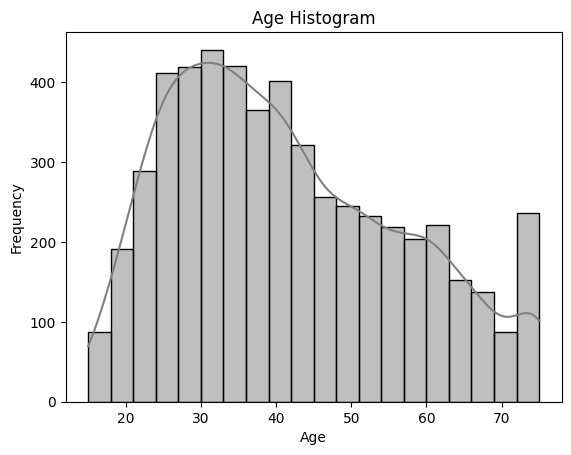

In [7]:
# histogram of age
sns.histplot(data=data_filter, x='age', bins=20, kde=True, color='grey')
plt.title('Age Histogram')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig(os.path.join(root_dir, 'figures', 'Age.png'))
plt.show()


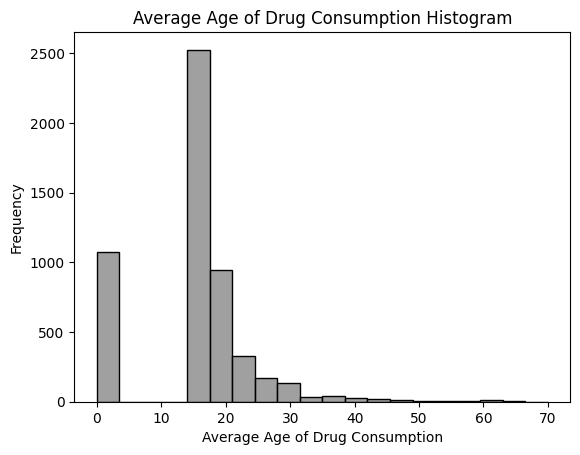

In [8]:
# histogram of average age of drug consumption
sns.histplot(data=data_filter, x='avg_age_drug_consumption', bins=20, color='grey')
plt.title('Average Age of Drug Consumption Histogram')
plt.xlabel('Average Age of Drug Consumption')
plt.ylabel('Frequency')
plt.savefig(os.path.join(root_dir, 'figures', 'Average Age of Drug Consumption.png'))
plt.show()


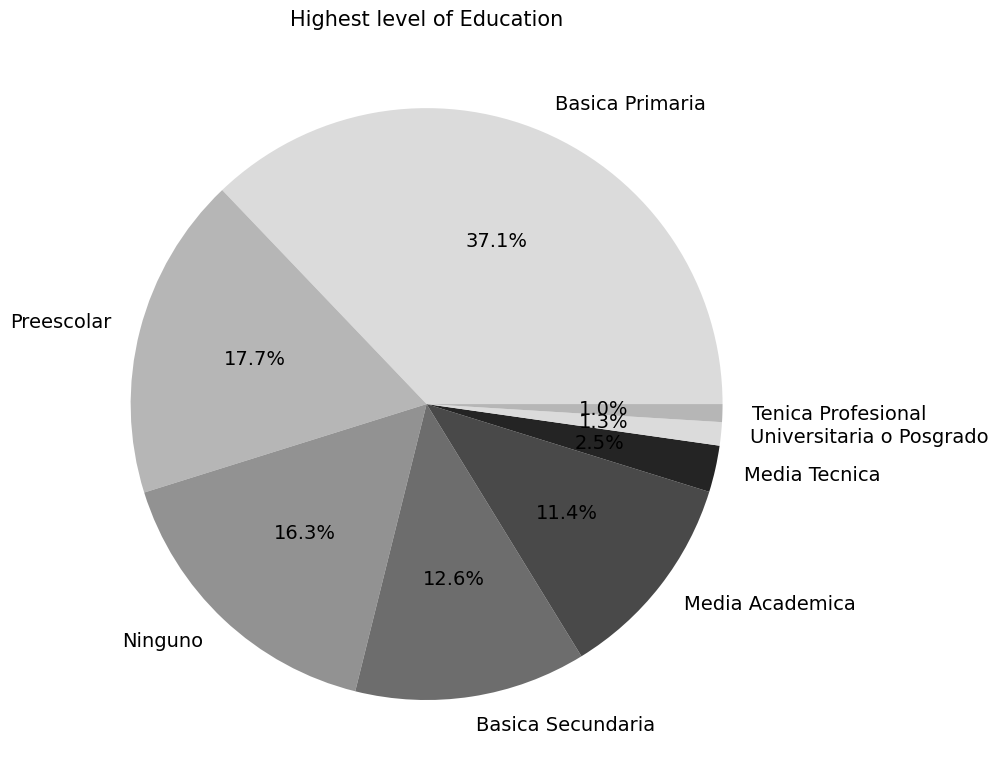

In [42]:
# pie chart of education level
data['P28R'].replace({
    1: 'Preescolar',
    2: 'Basica Primaria',
    3: 'Basica Secundaria',
    4: 'Media Academica',
    5: 'Media Tecnica',
    6: 'Tenica Profesional',
    7: 'Universitaria o Posgrado',
    8: 'Ninguno',
}, inplace=True)
# pie chart using sns
plt.figure(figsize=(10, 10))
plt.pie(
    data['P28R'].value_counts(),
    labels=data['P28R'].value_counts().index,
    autopct='%1.1f%%',
    textprops={'fontsize': 14}
    )
# set title
plt.title('Highest level of Education', fontsize=15)
plt.savefig(os.path.join(root_dir, 'figures', 'Highest level of Education.png'))
plt.show()

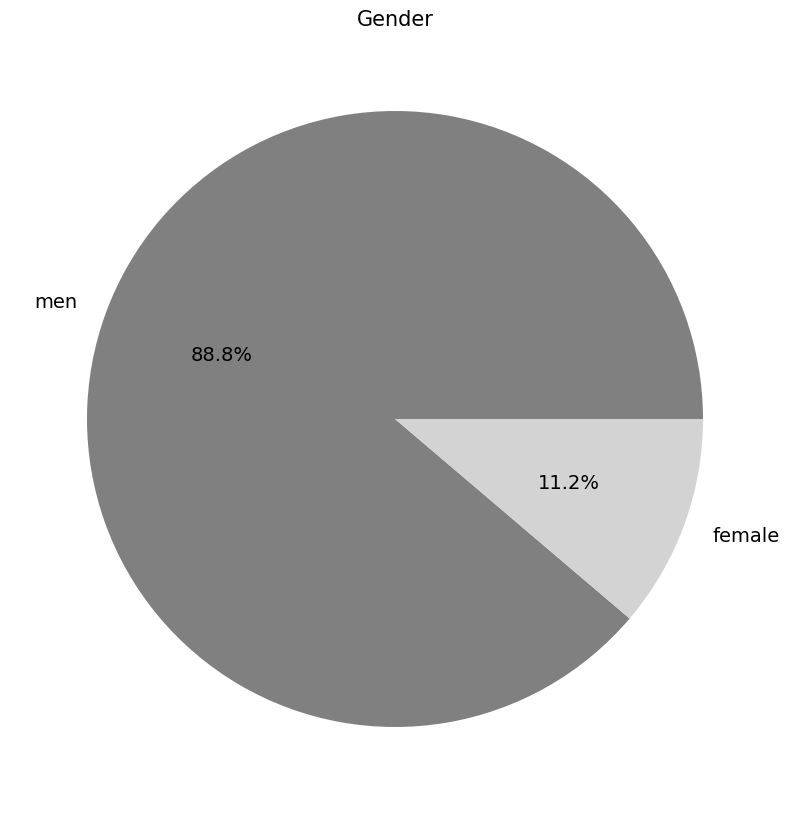

In [20]:
# Pie Chart of gender
plt.figure(figsize=(10, 10))
plt.pie(
    data_filter['gender'].value_counts(),
    labels=['men', 'female'],
    autopct='%1.1f%%',
    textprops={'fontsize': 14},
    colors=['grey', 'lightgrey'],
    )
# set title
plt.title('Gender', fontsize=15)
plt.savefig(os.path.join(root_dir, 'figures', 'Gender.png'))
plt.show()

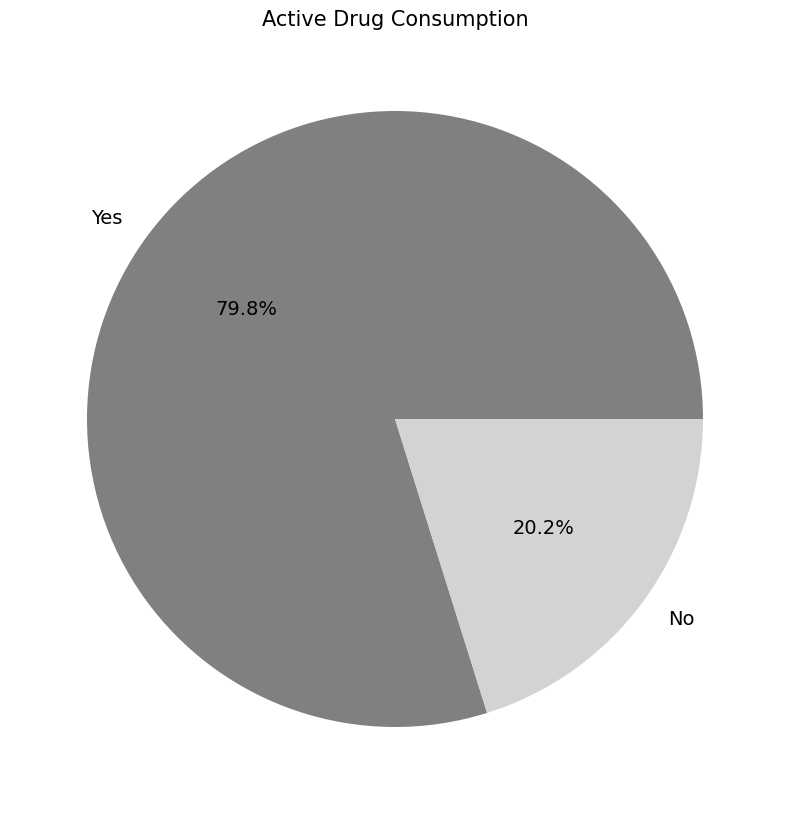

In [22]:
# get pie chart of drug consumption
plt.figure(figsize=(10, 10))
plt.pie(
    data_filter['drug_consumption'].value_counts(),
    labels=['Yes', 'No'],
    autopct='%1.1f%%',
    textprops={'fontsize': 14},
    colors=['grey', 'lightgrey'],
    )
plt.title('Active Drug Consumption', fontsize=15)
plt.savefig(os.path.join(root_dir, 'figures', 'Drug Consumption.png'))
plt.show()